In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
upload = files.upload()

Saving Linear_Reg.py to Linear_Reg.py


In [0]:
import Linear_Reg as lr

In [0]:
df = pd.read_csv('sample_data/mnist_train_small.csv',header = None)
X_train = np.array(df.iloc[:,1:785])
y_train = np.array(df.iloc[:,0])
df1 = pd.read_csv('sample_data/mnist_test.csv',header = None)
X_test = np.array(df1.iloc[:,1:785])
y_test = np.array(df1.iloc[:,0])

In [8]:
a = lr.Linear_Regression()
a.train()
a.fit(X_train,y_train)

Initial Cost: 7.786117071115743
Final Cost: 2.0159286320279928


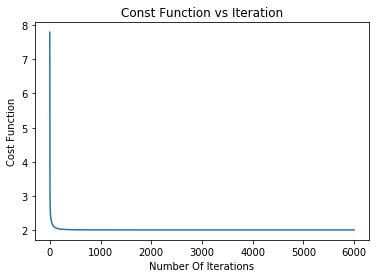

In [9]:
a.plot_learn()

In [0]:
# new y_pred takes arguments y_pred and threshold; changes y_pred based on the value of threshold.
def new_y_pred(y_pred,threshold):
    j = threshold
    for i in range(y_pred.shape[0]):
        x = y_pred[i]
        if(x<0+j):
          y_pred[i] = 0
        if(x>=0+j and x<1+j):
          y_pred[i] = 1
        if(x>=1+j and x<2+j):
          y_pred[i] = 2
        if(x>=2+j and x<3+j):
          y_pred[i] = 3
        if(x>=3+j and x<4+j):
          y_pred[i] = 4
        if(x>=4+j and x<5+j):
          y_pred[i] = 5
        if(x<=5+j and x>6+j):
          y_pred[i] = 6
        if(x>=6+j and x<7+j):
          y_pred[i] = 7
        if(x>=7+j and x<8+j):
          y_pred[i] = 8
        if(x>=8+j):
          y_pred[i] = 9
    y_pred.astype('int64')      
    return y_pred    

# threshold_cal takes no argument; finds the threshold which would give maximum training accuracy, and returns new y_pred using that threshold.
def threshold_cal():
    thre = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    my_acc = []
    for threshold in thre:
        y_pred = a.predict(X_train)
        y_pred = new_y_pred(y_pred,threshold)
        my_acc.append(a.accuracy(y_train,y_pred))
    max1_acc = max(my_acc)
    print("Max. Training Accuracy:",max1_acc)
    index1 = my_acc.index(max1_acc)
    thre_value = thre[index1]
    print("Threshold value:",thre_value)
    y_pred = a.predict(X_test)
    y_pred = new_y_pred(y_pred,thre_value)
    return y_pred   

In [11]:
y_pred = threshold_cal()
print("Test Accuracy:",a.accuracy(y_test,y_pred))

Max. Training Accuracy: 22.895
Threshold value: 0.9
Test Accuracy: 18.41


In [12]:
from sklearn.linear_model import LinearRegression
sk_learn = LinearRegression()
sk_learn.fit(X_train,y_train)
sk_acc = []
thre = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# finds the threshold with maximum training accuracy and using that threshold on y_pred_sk, finds the test accuracy.
for threshold in thre:
  y_pred_sk = sk_learn.predict(X_train)
  y_pred_sk = new_y_pred(y_pred_sk,threshold)
  sk_acc.append(a.accuracy(y_train,y_pred_sk))
max2_acc = max(sk_acc)
index2 = sk_acc.index(max2_acc)
thre_value = thre[index2]
print("Threshold Value:",thre_value)
y_pred_sk = sk_learn.predict(X_test)
y_pred_sk = new_y_pred(y_pred_sk,thre_value)
print("sk learn Test Accuracy:",a.accuracy(y_test,y_pred_sk))

Threshold Value: 0.9
sk learn Test Accuracy: 18.32
